## NYC

In [1]:
# population of NCY = 8.623 million (2017)

In [2]:
# import dependencies
import json
import pandas as pd
import glob
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import datetime as dt

In [3]:
url_NYC = "https://gbfs.citibikenyc.com/gbfs/en/station_information.json"
r_NYC = requests.get(url_NYC)
print(r_NYC)

<Response [200]>


In [4]:
NYC_stations_pd = pd.DataFrame(json.loads(r_NYC.content)['data']['stations'])[['station_id', 'name', 'lat', 'lon', 'rental_methods', 'capacity']]
NYC_stations_pd.head()

,station_id,name,lat,lon,rental_methods,capacity
0,304,Broadway & Battery Pl,40.704633,-74.013617,"[KEY, CREDITCARD]",33
1,359,E 47 St & Park Ave,40.755103,-73.974987,"[KEY, CREDITCARD]",64
2,367,E 53 St & Lexington Ave,40.758281,-73.970694,"[KEY, CREDITCARD]",34
3,402,Broadway & E 22 St,40.740343,-73.989551,"[KEY, CREDITCARD]",39
4,3255,8 Ave & W 31 St,40.750585,-73.994685,"[KEY, CREDITCARD]",19


In [5]:
NYC_stations_pd['capacity'].describe()

count    935.000000
mean      31.473797
std       12.056572
min       12.000000
25%       23.000000
50%       28.000000
75%       39.000000
max       79.000000
Name: capacity, dtype: float64

In [6]:
NYC_stations_pd.count()

station_id        935
name              935
lat               935
lon               935
rental_methods    935
capacity          935
dtype: int64

In [7]:
total_num_bikes_NYC = NYC_stations_pd['capacity'].sum()
total_num_bikes_NYC

29428

In [8]:
total_num_stations_NYC = NYC_stations_pd['name'].count()
total_num_stations_NYC

935

### NYC Ridership Data

In [9]:
path = "./nyc_rideshare_data" # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    NYC_ridership_pd = pd.read_csv(filename, index_col=None, header=0)
    li.append(NYC_ridership_pd)

NYC_ridership_pd = pd.concat(li, axis=0, ignore_index=True)

NYC_ridership_pd.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,W 52 St & 11 Ave,40.767272,-73.993929,505.0,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3255.0,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,W 52 St & 11 Ave,40.767272,-73.993929,525.0,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,W 52 St & 11 Ave,40.767272,-73.993929,447.0,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3356.0,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1


In [10]:
NYC_ridership_pd['ride_id'] = range(1, len(NYC_ridership_pd) + 1)

In [11]:
NYC_ridership_pd

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,ride_id
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,W 52 St & 11 Ave,40.767272,-73.993929,505.0,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3255.0,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1,2
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,W 52 St & 11 Ave,40.767272,-73.993929,525.0,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1,3
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,W 52 St & 11 Ave,40.767272,-73.993929,447.0,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1,4
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3356.0,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1,5
5,1602,2018-01-01 21:31:54.1920,2018-01-01 21:58:36.3530,72.0,W 52 St & 11 Ave,40.767272,-73.993929,482.0,W 15 St & 7 Ave,40.739355,-73.999318,30106,Subscriber,1968,1,6
6,722,2018-01-02 07:54:53.6460,2018-01-02 08:06:55.8720,72.0,W 52 St & 11 Ave,40.767272,-73.993929,228.0,E 48 St & 3 Ave,40.754601,-73.971879,32059,Subscriber,1978,1,7
7,434,2018-01-02 08:06:14.3310,2018-01-02 08:13:28.7670,72.0,W 52 St & 11 Ave,40.767272,-73.993929,173.0,Broadway & W 49 St,40.760683,-73.984527,30525,Subscriber,1983,1,8
8,366,2018-01-02 08:10:15.2550,2018-01-02 08:16:21.8960,72.0,W 52 St & 11 Ave,40.767272,-73.993929,479.0,9 Ave & W 45 St,40.760193,-73.991255,27439,Subscriber,1974,1,9
9,324,2018-01-02 08:13:30.8960,2018-01-02 08:18:55.1200,72.0,W 52 St & 11 Ave,40.767272,-73.993929,450.0,W 49 St & 8 Ave,40.762272,-73.987882,30892,Subscriber,1947,1,10


#### Exploring Data

In [12]:
NYC_ridership_pd.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ride_id
count,1.754834e+07,1.754584e+07,1.754834e+07,1.754834e+07,1.754584e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07
mean,9.887432e+02,1.589282e+03,4.073737e+01,-7.398260e+01,1.580830e+03,4.073704e+01,-7.398281e+01,2.656141e+04,1.978993e+03,1.148613e+00,8.774170e+06
std,1.889584e+04,1.439432e+03,3.225813e-02,1.912753e-02,1.438502e+03,3.206583e-02,1.919611e-02,6.222916e+03,1.192922e+01,5.438043e-01,5.065769e+06
min,6.100000e+01,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.408364e+01,1.452900e+04,1.885000e+03,0.000000e+00,1.000000e+00
25%,3.580000e+02,3.800000e+02,4.071755e+01,-7.399521e+01,3.800000e+02,4.071755e+01,-7.399595e+01,2.029300e+04,1.969000e+03,1.000000e+00,4.387086e+06
50%,6.050000e+02,5.050000e+02,4.073818e+01,-7.398565e+01,5.050000e+02,4.073756e+01,-7.398602e+01,2.827000e+04,1.981000e+03,1.000000e+00,8.774170e+06
75%,1.060000e+03,3.249000e+03,4.075763e+01,-7.397283e+01,3.249000e+03,4.075725e+01,-7.397344e+01,3.185200e+04,1.989000e+03,1.000000e+00,1.316125e+07
max,1.951005e+07,3.721000e+03,4.550636e+01,-7.356891e+01,3.721000e+03,4.550636e+01,-7.356891e+01,3.583100e+04,2.002000e+03,2.000000e+00,1.754834e+07


In [13]:
NYC_ridership_pd.count()

tripduration               17548339
starttime                  17548339
stoptime                   17548339
start station id           17545842
start station name         17545842
start station latitude     17548339
start station longitude    17548339
end station id             17545842
end station name           17545842
end station latitude       17548339
end station longitude      17548339
bikeid                     17548339
usertype                   17548339
birth year                 17548339
gender                     17548339
ride_id                    17548339
dtype: int64

#### Outliers

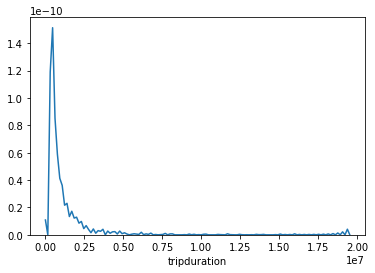

In [14]:
# plot the number of rides by seconds
fig, ax = plt.subplots(1, 1)

sns.distplot(NYC_ridership_pd['tripduration'], hist=False)

In [15]:
# Removing false start trips
NYC_ridership_pd = NYC_ridership_pd[(NYC_ridership_pd['tripduration']>=60)]
NYC_ridership_pd.count()

tripduration               17548339
starttime                  17548339
stoptime                   17548339
start station id           17545842
start station name         17545842
start station latitude     17548339
start station longitude    17548339
end station id             17545842
end station name           17545842
end station latitude       17548339
end station longitude      17548339
bikeid                     17548339
usertype                   17548339
birth year                 17548339
gender                     17548339
ride_id                    17548339
dtype: int64

In [16]:
# Removing outliers
q1 = NYC_ridership_pd['tripduration'].quantile(0.25)
q3 = NYC_ridership_pd['tripduration'].quantile(0.75)

interquartile_range = q3 - q1

NYC_ridership_pd = NYC_ridership_pd[~((NYC_ridership_pd['tripduration'] < (q1 - 1.5 * interquartile_range)) \
         |(NYC_ridership_pd['tripduration'] > (q3 + 1.5 * interquartile_range)))].reset_index(drop=True)
NYC_ridership_pd.count()

tripduration               16723697
starttime                  16723697
stoptime                   16723697
start station id           16721624
start station name         16721624
start station latitude     16723697
start station longitude    16723697
end station id             16721624
end station name           16721624
end station latitude       16723697
end station longitude      16723697
bikeid                     16723697
usertype                   16723697
birth year                 16723697
gender                     16723697
ride_id                    16723697
dtype: int64

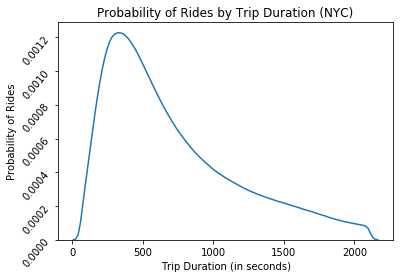

In [17]:
# replot for ALL members
fig, ax = plt.subplots(1, 1)

sns.distplot(NYC_ridership_pd['tripduration'], hist=False)
plt.yticks(rotation=50)
plt.xlabel("Trip Duration (in seconds)")
plt.ylabel("Probability of Rides")
plt.title("Probability of Rides by Trip Duration (NYC)")

plt.savefig('Probability of Rides by Trip Duration (NYC).png')
plt.show()

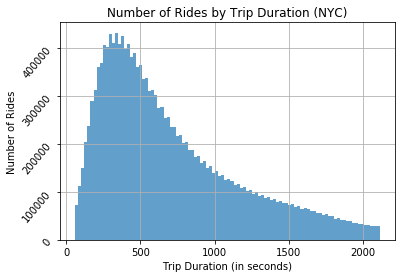

In [18]:
# replot for ALL members
plt.hist(NYC_ridership_pd['tripduration'], bins=100, density=False, alpha=0.7)
plt.yticks(rotation=50)
plt.xlabel("Trip Duration (in seconds)")
plt.ylabel("Number of Rides")
plt.title("Number of Rides by Trip Duration (NYC)")
plt.grid(True)

plt.savefig("Number of Rides by Trip Duration (NYC).png")
plt.show()

#### Gender Comparison (NYC ONLY)

In [19]:
# females vs males averages
NYCgender_pd = NYC_ridership_pd.groupby("gender").mean()
NYCgender_pd

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,ride_id
gender,,,,,,,,,,
0,1040.122136,1727.437355,40.738735,-73.982545,1711.945030,40.738323,-73.982856,25570.320754,1969.817115,8.530148e+06
1,659.444774,1536.484554,40.737843,-73.982965,1528.354668,40.737564,-73.983132,26844.198468,1979.521224,8.754293e+06
2,748.372368,1652.142639,40.734745,-73.981892,1639.986757,40.734505,-73.982209,26067.394501,1980.754405,8.874942e+06


In [20]:
# counting how many of each gender
NYCgender_pd = NYC_ridership_pd.groupby("gender").count()
NYCgender_pd

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,ride_id
gender,,,,,,,,,,,,,,,
0,1277017,1277017,1277017,1276815,1276815,1277017,1277017,1276815,1276815,1277017,1277017,1277017,1277017,1277017,1277017
1,11559160,11559160,11559160,11557716,11557716,11559160,11559160,11557716,11557716,11559160,11559160,11559160,11559160,11559160,11559160
2,3887520,3887520,3887520,3887093,3887093,3887520,3887520,3887093,3887093,3887520,3887520,3887520,3887520,3887520,3887520


##### male stats

In [21]:
# number of males, check if it matches above
male = NYC_ridership_pd.loc[NYC_ridership_pd.gender == 1, 'gender'].count()
male

11559160

In [22]:
# Average trip_duration_seconds for males
malemembers_pd = NYC_ridership_pd.filter(['gender', "tripduration"])
malemembers_pd = malemembers_pd[malemembers_pd.gender != 2][malemembers_pd.gender != 0]
malemembers_pd.head()

C:\Users\jenni\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,gender,tripduration
0,1,970
1,1,723
2,1,496
3,1,306
4,1,306


In [23]:
malemembers_pd.describe()

,gender,tripduration
count,11559160.0,1.155916e+07
mean,1.0,6.594448e+02
std,0.0,4.446412e+02
min,1.0,6.100000e+01
25%,1.0,3.260000e+02
50%,1.0,5.320000e+02
75%,1.0,8.800000e+02
max,1.0,2.113000e+03


##### female stats

In [24]:
# number of females, check if it matches above
female = NYC_ridership_pd.loc[NYC_ridership_pd.gender == 2, 'gender'].count()
female

3887520

In [25]:
# Average trip_duration_seconds for females
femalemembers_pd = NYC_ridership_pd.filter(['gender', "tripduration"])
femalemembers_pd = femalemembers_pd[femalemembers_pd.gender != 1][femalemembers_pd.gender != 0]
femalemembers_pd.head()

C:\Users\jenni\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,gender,tripduration
56,2,807
61,2,1736
69,2,1067
72,2,376
78,2,395


In [26]:
femalemembers_pd.describe()

,gender,tripduration
count,3887520.0,3.887520e+06
mean,2.0,7.483724e+02
std,0.0,4.675269e+02
min,2.0,6.100000e+01
25%,2.0,3.850000e+02
50%,2.0,6.260000e+02
75%,2.0,1.018000e+03
max,2.0,2.113000e+03


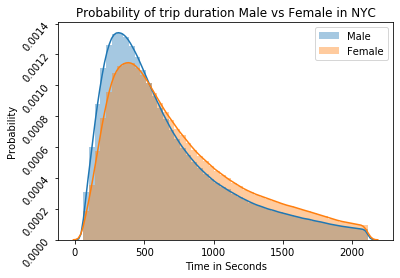

In [27]:
# plot the number of rides by seconds
fig, ax = plt.subplots(1, 1)

sns.distplot(malemembers_pd['tripduration'], hist=True, label = "Male")
sns.distplot(femalemembers_pd['tripduration'], hist=True, label = "Female")

plt.title("Probability of trip duration Male vs Female in NYC")
plt.yticks(rotation=50)
plt.ylabel("Probability")
plt.xlabel("Time in Seconds")
plt.legend()

plt.savefig('Probability of trip duration Male vs Female (NYC).png')
plt.show()

##### Annual Members

In [28]:
# Number of annual members
NYCannualmembers = NYC_ridership_pd.loc[NYC_ridership_pd.usertype == 'Subscriber', 'usertype'].count()
NYCannualmembers

15100435

In [29]:
# Average trip_duration_seconds of annual members
NYCannualmembers_pd = NYC_ridership_pd.filter(['usertype', "tripduration"])
NYCannualmembers_pd = NYCannualmembers_pd[NYCannualmembers_pd.usertype != 'Customer']
NYCannualmembers_pd.head()

,usertype,tripduration
0,Subscriber,970
1,Subscriber,723
2,Subscriber,496
3,Subscriber,306
4,Subscriber,306


In [30]:
NYCannualmembers_pd.describe()

,tripduration
count,1.510044e+07
mean,6.648574e+02
std,4.427355e+02
min,6.100000e+01
25%,3.330000e+02
50%,5.400000e+02
75%,8.860000e+02
max,2.113000e+03


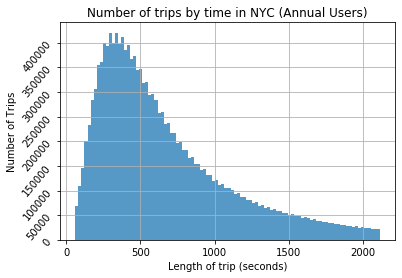

In [31]:
# Plot for annual members
plt.hist(NYCannualmembers_pd["tripduration"], bins=100, density=False, alpha=0.75)

plt.title(f"Number of trips by time in NYC (Annual Users)")
plt.xlabel("Length of trip (seconds)")
plt.ylabel('Number of Trips')
plt.yticks(rotation=50)

plt.grid(True)

plt.savefig('Number of trips by time in NYC for annual users.png')
plt.show()

##### Casual Members

In [32]:
# Number of casual members
NYCcasualmembers = NYC_ridership_pd.loc[NYC_ridership_pd.usertype == 'Customer', 'usertype'].count()
NYCcasualmembers

1623262

In [33]:
# Average trip_duration_seconds of casual members
NYCcasualmembers_pd = NYC_ridership_pd.filter(['usertype', "tripduration"])
NYCcasualmembers_pd = NYCcasualmembers_pd[NYCcasualmembers_pd.usertype != 'Subscriber']
NYCcasualmembers_pd.head()

,usertype,tripduration
21,Customer,520
22,Customer,430
74,Customer,1357
75,Customer,1364
203,Customer,482


In [34]:
NYCcasualmembers_pd.describe()

,tripduration
count,1.623262e+06
mean,1.121543e+03
std,4.883478e+02
min,6.100000e+01
25%,7.300000e+02
50%,1.137000e+03
75%,1.511000e+03
max,2.113000e+03


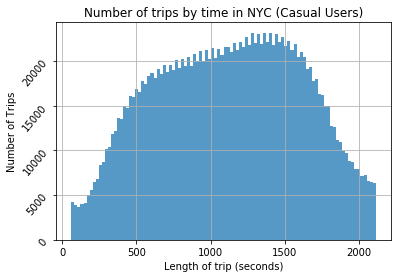

In [35]:
# Plot for casual members
plt.hist(NYCcasualmembers_pd["tripduration"], bins=100, density=False, alpha=0.75)

plt.title(f"Number of trips by time in NYC (Casual Users)")
plt.xlabel("Length of trip (seconds)")
plt.ylabel('Number of Trips')
plt.yticks(rotation=50)

plt.grid(True)

plt.savefig('Number of trips by time in NYC for casual users.png')
plt.show()

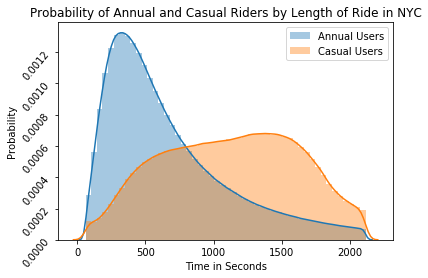

In [36]:
# plot both subscriber and customer
fig, ax = plt.subplots(1, 1)

sns.distplot(NYCannualmembers_pd['tripduration'], hist=True, label='Annual Users')
sns.distplot(NYCcasualmembers_pd['tripduration'], hist=True, label='Casual Users')

plt.title("Probability of Annual and Casual Riders by Length of Ride in NYC")
plt.yticks(rotation=50)
plt.ylabel("Probability")
plt.xlabel("Time in Seconds")
plt.legend()
plt.savefig('trip duration of annual vs casual (NYC).png')
plt.show()

#### Age Demographics (NYC ONLY)

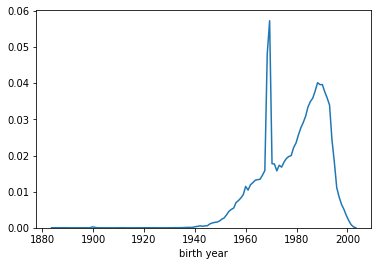

In [37]:
# Establish bins for ages ("birth year"). Min was 1885 and max was 2002 per .describe()
fig, ax = plt.subplots(1, 1)
sns.distplot(NYC_ridership_pd['birth year'], hist=False)

In [38]:
NYC_ridership_pd.count()

tripduration               16723697
starttime                  16723697
stoptime                   16723697
start station id           16721624
start station name         16721624
start station latitude     16723697
start station longitude    16723697
end station id             16721624
end station name           16721624
end station latitude       16723697
end station longitude      16723697
bikeid                     16723697
usertype                   16723697
birth year                 16723697
gender                     16723697
ride_id                    16723697
dtype: int64

In [39]:
# Removing outliers, ex. those born in 1885 would be 135 in 2020
q1 = NYC_ridership_pd['birth year'].quantile(0.25)
q2 = NYC_ridership_pd['birth year'].quantile(0.5)
q3 = NYC_ridership_pd['birth year'].quantile(0.75)

NYC_ridership_pd = NYC_ridership_pd[~((NYC_ridership_pd['birth year'] < (q1 - 7)))].reset_index(drop=True)
NYC_ridership_pd.count()

tripduration               15305146
starttime                  15305146
stoptime                   15305146
start station id           15303142
start station name         15303142
start station latitude     15305146
start station longitude    15305146
end station id             15303142
end station name           15303142
end station latitude       15305146
end station longitude      15305146
bikeid                     15305146
usertype                   15305146
birth year                 15305146
gender                     15305146
ride_id                    15305146
dtype: int64

In [40]:
NYC_ridership_pd.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ride_id
count,1.530515e+07,1.530314e+07,1.530515e+07,1.530515e+07,1.530314e+07,1.530515e+07,1.530515e+07,1.530515e+07,1.530515e+07,1.530515e+07,1.530515e+07
mean,7.107920e+02,1.584218e+03,4.073680e+01,-7.398246e+01,1.577073e+03,4.073652e+01,-7.398268e+01,2.656361e+04,1.981263e+03,1.150105e+00,8.790087e+06
std,4.678749e+02,1.439537e+03,3.180428e-02,1.921073e-02,1.439104e+03,3.157615e-02,1.928765e-02,6.216957e+03,9.702336e+00,5.416611e-01,5.066887e+06
min,6.100000e+01,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.406661e+01,1.452900e+04,1.962000e+03,0.000000e+00,1.000000e+00
25%,3.490000e+02,3.800000e+02,4.071755e+01,-7.399517e+01,3.790000e+02,4.071755e+01,-7.399530e+01,2.030700e+04,1.972000e+03,1.000000e+00,4.400540e+06
50%,5.780000e+02,5.050000e+02,4.073726e+01,-7.398565e+01,5.040000e+02,4.073705e+01,-7.398621e+01,2.826600e+04,1.983000e+03,1.000000e+00,8.803026e+06
75%,9.720000e+02,3.249000e+03,4.075693e+01,-7.397210e+01,3.254000e+03,4.075641e+01,-7.397283e+01,3.183900e+04,1.989000e+03,1.000000e+00,1.318082e+07
max,2.113000e+03,3.721000e+03,4.550636e+01,-7.356891e+01,3.721000e+03,4.550636e+01,-7.356891e+01,3.583100e+04,2.002000e+03,2.000000e+00,1.754834e+07


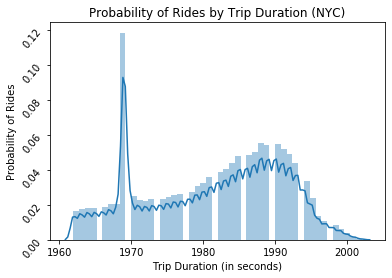

In [41]:
# replot for removed outliers
fig, ax = plt.subplots(1, 1)

sns.distplot(NYC_ridership_pd['birth year'], hist=True)
plt.yticks(rotation=50)
plt.xlabel("Trip Duration (in seconds)")
plt.ylabel("Probability of Rides")
plt.title("Probability of Rides by Trip Duration (NYC)")

plt.savefig("Probability of Rides by Age (NYC)")
plt.show()

In [ ]:
#bins and bin names
bins_age = [0,1959.9, 1970.1, 1980.1, 1990.1, 2000.1, 2010.1]
grouped_name = [">1960", "1961-1970", "1971-1980", "1981-1990", "1991-2000", "2001-2010"]

#cutting (can only cut once)
# NYC_ridership_pd["birth year"] = pd.cut(NYC_ridership_pd["birth year"], bins_age, labels = grouped_name)

#calculate the ages
age_range = NYC_ridership_pd.groupby(["birth year"])
count_age = age_range.nunique()["ride_id"]
riders = NYC_ridership_pd["ride_id"].nunique()

#percent = number in bin/total x 100
percent_age = (count_age / riders) *100

#create the dataframe
age_range = pd.DataFrame({"Total Count":count_age, "Percentage of Riders":percent_age})  

#create the dataframe
age_range.style.format({"Percentage of Riders":"{:,.2f}%"})

In [ ]:
#bins and bin names
bins_age = [0,1959.9, 1970.1, 1980.1, 1990.1, 2000.1, 2010.1]
grouped_name = [">1960", "1961-1970", "1971-1980", "1981-1990", "1991-2000", "2001-2010"]

#cutting (can only cut once)
NYC_ridership_pd["birth year"] = pd.cut(NYC_ridership_pd["birth year"], bins_age, labels = grouped_name)

#calculate the ages
age_range = NYC_ridership_pd.groupby(["birth year"])
count_age = age_range.nunique()["ride_id"]
riders = NYC_ridership_pd["ride_id"].nunique()

#percent = number in bin/total x 100
percent_age = (count_age / riders) *100

#create the dataframe
age_range = pd.DataFrame({"Total Count":count_age, "Percentage of Riders":percent_age})  

#create the dataframe
age_range.style.format({"Percentage of Riders":"{:,.2f}%"})

## Toronto

In [ ]:
# population of toronto = 2.93 million (2017)

In [ ]:
url_Toronto = "https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information"
r_Toronto = requests.get(url_Toronto)
print(r_Toronto)

In [ ]:
Toronto_stations_pd = pd.DataFrame(json.loads(r_Toronto.content)['data']['stations'])[['station_id', 'name', 'lat', 'lon', 'rental_methods', 'capacity']]
Toronto_stations_pd.head()

In [ ]:
Toronto_stations_pd['capacity'].describe()

In [ ]:
Toronto_stations_pd.count()

In [ ]:
total_num_bikes_Toronto = Toronto_stations_pd['capacity'].sum()
total_num_bikes_Toronto

In [ ]:
total_num_stations_Toronto = Toronto_stations_pd['name'].count()
total_num_stations_Toronto

### Toronto Ridership Data

In [ ]:
path = "./toronto_rideshare_data" # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    toronto_ridership_pd = pd.read_csv(filename, index_col=None, header=0)
    li.append(toronto_ridership_pd)

toronto_ridership_pd = pd.concat(li, axis=0, ignore_index=True)

toronto_ridership_pd.head()

#### Exploring Data

In [ ]:
toronto_ridership_pd.describe()

In [ ]:
toronto_ridership_pd.count()

#### Outliers

In [ ]:
# plot the number of rides by seconds
fig, ax = plt.subplots(1, 1)

sns.distplot(toronto_ridership_pd['trip_duration_seconds'], hist=False)

In [ ]:
# Removing false start trips
toronto_ridership_pd = toronto_ridership_pd[(toronto_ridership_pd['trip_duration_seconds']>=60)]
toronto_ridership_pd.count()

In [ ]:
# Removing outliers
q1 = toronto_ridership_pd['trip_duration_seconds'].quantile(0.25)
q3 = toronto_ridership_pd['trip_duration_seconds'].quantile(0.75)

interquartile_range = q3 - q1

toronto_ridership_pd = toronto_ridership_pd[~((toronto_ridership_pd['trip_duration_seconds'] < (q1 - 1.5 * interquartile_range)) \
         |(toronto_ridership_pd['trip_duration_seconds'] > (q3 + 1.5 * interquartile_range)))].reset_index(drop=True)
toronto_ridership_pd.count()

In [ ]:
# replot the number of rides by seconds after outliers removed
fig, ax = plt.subplots(1, 1)

sns.distplot(toronto_ridership_pd['trip_duration_seconds'], hist=False)
plt.yticks(rotation=50)
plt.xlabel("Trip Duration (in seconds)")
plt.ylabel("Probability of Rides")
plt.title("Probability of Rides by Trip Duration (Toronto)")

plt.savefig("Probability of Rides by Trip Duration (Toronto)")
plt.show()

In [ ]:
# replot for ALL members
plt.hist(toronto_ridership_pd['trip_duration_seconds'], bins=100, density=False, alpha=0.7)
plt.yticks(rotation=50)
plt.xlabel("Trip Duration (in seconds)")
plt.ylabel("Number of Rides")
plt.title("Number of Rides by Trip Duration (Toronto)")
plt.grid(True)
plt.savefig("Number of Rides by Trip Duration (Toronto)")
plt.show()

##### Annual Members

In [ ]:
# Number of annual members
annualmembers = toronto_ridership_pd.loc[toronto_ridership_pd.user_type == 'Annual Member', 'user_type'].count()
annualmembers

In [ ]:
# Average trip_duration_seconds of annual members
annualmembers_pd = toronto_ridership_pd.filter(['user_type', "trip_duration_seconds"])
annualmembers_pd = annualmembers_pd[annualmembers_pd.user_type != 'Casual Member']
annualmembers_pd['ride_id'] = range(1, len(annualmembers_pd) + 1)
annualmembers_pd.head()

In [ ]:
annualmembers_pd.describe()

In [ ]:
# Plot for casual members
plt.hist(annualmembers_pd["trip_duration_seconds"], bins=100, density=False, alpha=0.75)

plt.title(f"Number of trips by time in Toronto (Casual Users)")
plt.xlabel("Length of trip (seconds)")
plt.ylabel('Number of Trips')
plt.yticks(rotation=50)

plt.grid(True)

plt.savefig('Number of trips by time in Toronto for casual users.png')
plt.show()

##### Casual Members

In [ ]:
# Number of casual members
casualmembers = toronto_ridership_pd.loc[toronto_ridership_pd.user_type == 'Casual Member', 'user_type'].count()
casualmembers

In [ ]:
# Average trip_duration_seconds of annual members
casualmembers_pd = toronto_ridership_pd.filter(['user_type', "trip_duration_seconds"])
casualmembers_pd = casualmembers_pd[casualmembers_pd.user_type != 'Annual Member']
# casualmembers_pd['ride_id'] = range(1, len(casualmembers_pd) + 1)
casualmembers_pd.head()

In [ ]:
casualmembers_pd.describe()

In [ ]:
# Plot for casual members
plt.hist(casualmembers_pd["trip_duration_seconds"], bins=100, density=False, alpha=0.75)

plt.title(f"Number of trips by time in Toronto (Casual Users)")
plt.xlabel("Length of trip (seconds)")
plt.ylabel('Number of Trips')
plt.yticks(rotation=50)

plt.grid(True)

plt.savefig('Number of trips by time in Toronto for casual users.png')
plt.show()

In [ ]:
# use seaborn to plot the probability of both annual and casual for comparison
fig, ax = plt.subplots(1, 1)

sns.distplot(annualmembers_pd['trip_duration_seconds'], hist=True, label='Annual Members')
sns.distplot(casualmembers_pd['trip_duration_seconds'], hist=True, label='Casual Members')
plt.title("Probability of Annual and Casual Riders by Length of Ride in Toronto")
plt.yticks(rotation=50)
plt.ylabel("Probability")
plt.xlabel("Time in Seconds")
plt.legend()
plt.savefig('trip duration (toronto).png')
plt.show()